In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.datasets import fashion_mnist


Exploratory data analysis

In [2]:
# import data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


In [3]:
# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# split training data into training and validation sets
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

X_train_rf = X_train_clf.reshape(len(X_train_clf), 784)
X_val_rf = X_val_clf.reshape(len(X_val_clf), 784)
X_test_rf = x_test.reshape(len(x_test), 784)





In [7]:
labels = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# find number of samples from each class
[out_labels, inverse_indices, counts] = np.unique(y_train_clf, return_counts=True, return_inverse=True)

<function matplotlib.pyplot.show(close=None, block=None)>

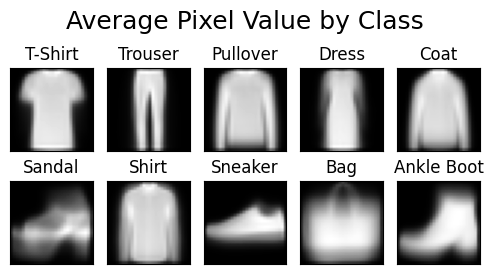

In [5]:
# get average of all pixels for each clothing type

# define figure/subplots
plt.figure(figsize=(5, 3))


plt.suptitle("Average Pixel Value by Class", fontsize=18, y=0.95)

img_means = np.empty(10, dtype = 'object')

for n, i_label in enumerate(labels):
  # create mask of T/F to get indices that match class i_label
  mask = y_train_clf == n
  # index training data given mask
  t_class = X_train_clf[mask,]


  # set axes and plot info
  ax = plt.subplot(2,5, n+1)
  img_means[n] = np.mean(t_class, 0)
  ax.imshow(img_means[n], cmap = "gray")
  ax.set_title(labels[n])
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout(h_pad = 1, w_pad=1)
plt.show
#plt.savefig("avg_val.png")
#files.download("avg_val.png")

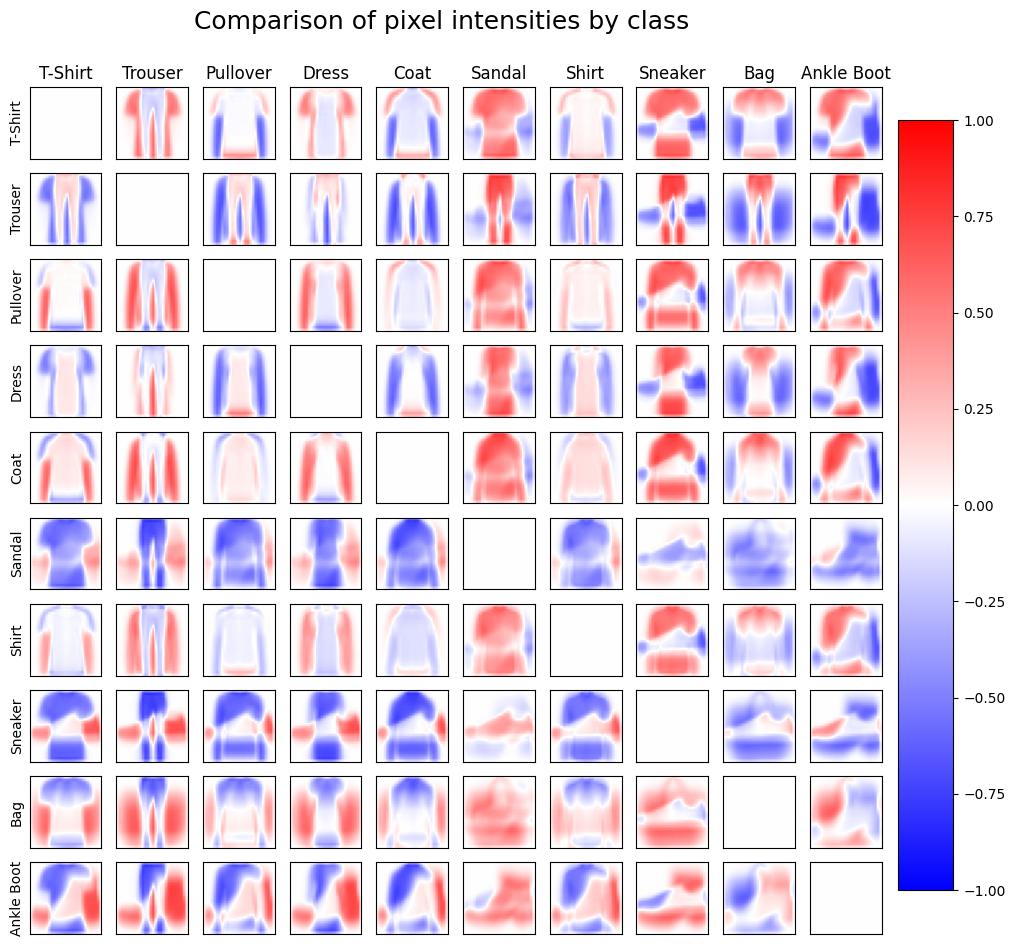

In [6]:
# pairwise comparison of classes

# define figure/subplots
fig = plt.figure(figsize=(11, 11))
#fig.subplots_adjust(hspace=0, wspace = 0)
fig.tight_layout()
fig.suptitle("Comparison of pixel intensities by class", fontsize=18, y=0.95)
p = 1;
for j, avg_outer in enumerate(img_means):
  for k, avg_inner in enumerate(img_means):
    # find difference between average of 2 classes
    diff1 = avg_outer - avg_inner

    # set axes and plot info
    ax = plt.subplot(10,10, p)
    im = ax.imshow(diff1, cmap="bwr", vmin = -1, vmax = 1 )
    #ax.set_title(labels[i_label])
    ax.set_xticks([])
    ax.set_yticks([])

    if j == 0:
      ax.set_title(labels[k])
    if k == 0:
      ax.set_ylabel(labels[j])

    p = p + 1



fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.915, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show
plt.savefig("pairwise_comparisons.png")
#files.download("pairwise_comparisons.png")